<a href="https://colab.research.google.com/github/FL24-Team-2018/DP-Experiment/blob/master/analysis/plot_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hack to enable latex in matplotlib from https://stackoverflow.com/questions/55746749/latex-equations-do-not-render-in-google-colaboratory-when-using-matplotlib

! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
#mpl.use("pgf")
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/DP-experiment/2019-06-12 results Wiener.csv"
url = 'https://raw.githubusercontent.com/FL24-Team-2018/DP-Experiment/master/analysis/2019-06-12%20results%20Wiener.csv'
df = pd.read_csv(url)

In [104]:
df.columns

Index(['measurement', 'label', 'wavelength / nm', 'd / um', 'd / σ_B',
       'd / σ_B err', 'orientation', 'sigma_B / um', 'sigma_B_err / %',
       'sigma_B_err / um', 'xi / um', 'xi std / um', 'ξ_std / %', 'ξ/σ_B',
       'Unnamed: 14', 'ξ/σ_err / %', 'ξ/σ_err', 'zeta', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'of averaged image',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
df.label.unique()

In [5]:
df[df['label']=='18nm horizontal S']['d / σ_B']

5     0.6476
7     0.9699
9     1.3404
11    2.1295
Name: d / σ_B, dtype: float64

In [73]:
df['label'].unique()

array(['18nm vertical L', '18nm horizontal L', '18nm vertical S',
       '18nm horizontal S', '8nm vertical S', '8nm horizontal S',
       '13.5nm vertical L', '13.5nm horizontal L', '13.5nm vertical S',
       '13.5nm horizontal S', nan], dtype=object)

# Creating the plots

In [6]:
IPython_default = plt.rcParams.copy()

In [83]:
# nature: single-column width = 83mm = 3.26 in
# nature: double-column width = 183mm = 7.20 in
# optics express: side by side up to width = 66mm = 2.59 in
# optics express: maximum width of text= 132.8mm = 5.25 in
# optics express: caption font size=8 pt
# new journal of physics ?

#figurewidth = 3.26 # in inch
figurewidth = 7.2 # in inch
figureheight = figurewidth / 1.618 # golden ratio

In [84]:
pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots 
    "font.sans-serif": [],              # to inherit fonts from the document
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts 
    "xtick.labelsize": 8,               # a little smaller
    "ytick.labelsize": 8,
    "figure.figsize": [figurewidth, figureheight],     # default fig size of 0.9 textwidth
    'figure.dpi': 300, 
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts 
        r"\usepackage[T1]{fontenc}",        # plots will be generated
        r"\usepackage[detect-all,locale=DE]{siunitx}",
        r"\usepackage{amsmath}"
        ]                                   # using this preamble
    }

rcparams_with_latex = {                      # setup matplotlib to use latex for output
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots 
    "font.sans-serif": [],              # to inherit fonts from the document
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts 
    "xtick.labelsize": 8,               # a little smaller
    "ytick.labelsize": 8,
    "figure.figsize": [figurewidth, figureheight],     # default fig size of 0.9 textwidth
    "figure.dpi": 300, 
    "text.latex.preamble": [
        #r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts 
        r"\usepackage[T1]{fontenc}",        # plots will be generated
        r'\usepackage{lmodern}', # otherwise savefig to pdf will produce an error!!
        r"\usepackage[detect-all,locale=DE]{siunitx}",
        r"\usepackage{amsmath}"
        ]                                   # using this preamble
    }


#mpl.rcParams.update(pgf_with_latex)
mpl.rcParams.update(rcparams_with_latex)

C:\Users\Thomas\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


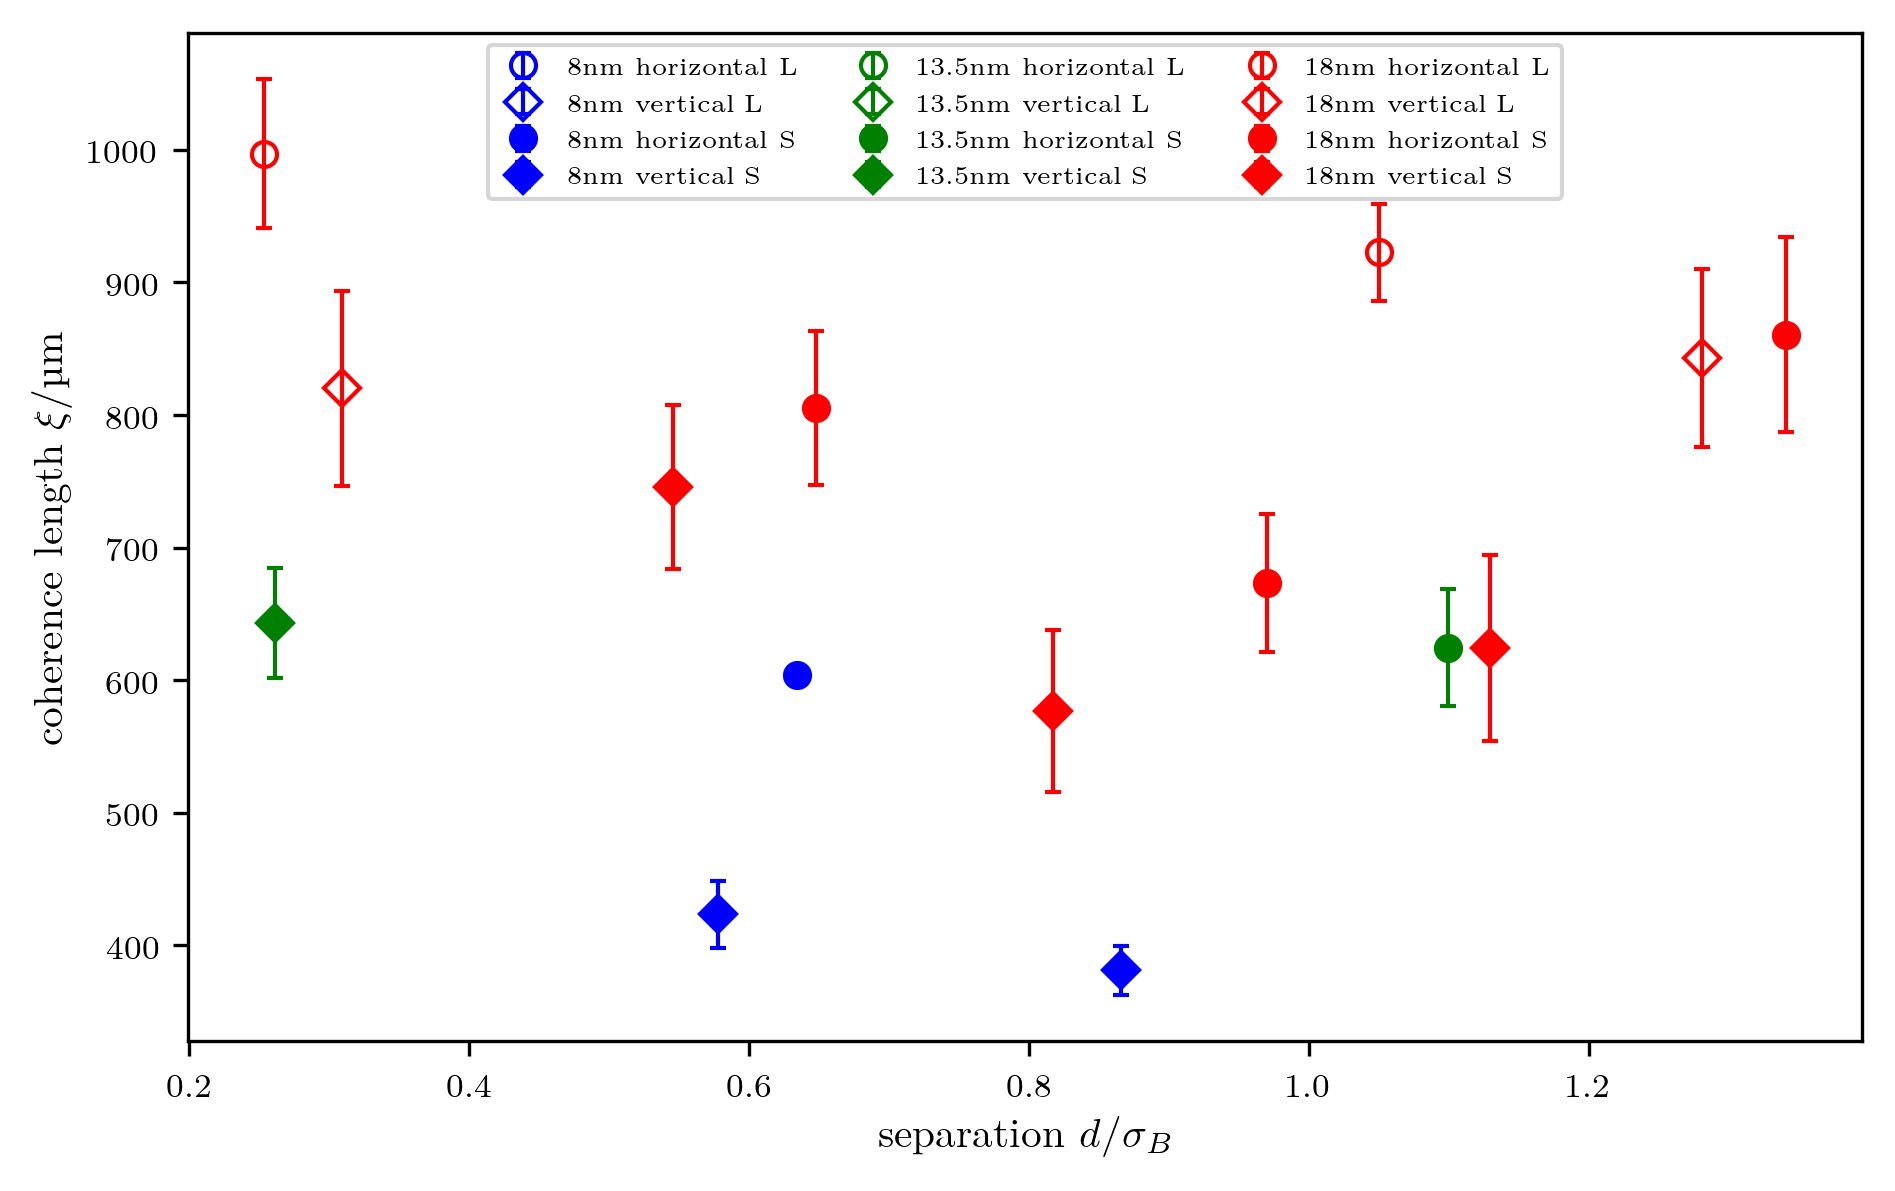

In [109]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True)
ax = axs

x_name = 'd / σ_B'
y_name = 'xi / um'
yerr_name = 'xi std / um'

label = '8nm horizontal L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
            capsize=2, elinewidth=1, markeredgewidth=1, color='blue', fillstyle='none', label=label)
label = '8nm vertical L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
            capsize=2, elinewidth=1, markeredgewidth=1, color='blue', fillstyle='none', label=label)
label = '8nm horizontal S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='blue', label=label)
label = '8nm vertical S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='blue', label=label)

label = '13.5nm horizontal L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='green', fillstyle='none', label=label)
label = '13.5nm vertical L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='green', fillstyle='none', label=label)
label = '13.5nm horizontal S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='green', label=label)
label = '13.5nm vertical S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='green', label=label)

label = '18nm horizontal L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='red', fillstyle='none', label=label)
label = '18nm vertical L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='red', fillstyle='none', label=label)
label = '18nm horizontal S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='red', label=label)
label = '18nm vertical S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='red', label=label)

plt.legend(loc=9, ncol=3, prop={'size': 6})

ax.set_xlabel('separation $ d / \\sigma_B $')
ax.set_ylabel('coherence length $ \\xi / \si{\\micro\\meter} $')
plt.show()

savefigure = True
if savefigure == True:
    fig.savefig('coherencelength_vs_separation.pdf', bbox_inches = 'tight')
    fig.savefig('coherencelength_vs_separation.png', bbox_inches = 'tight')

C:\Users\Thomas\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


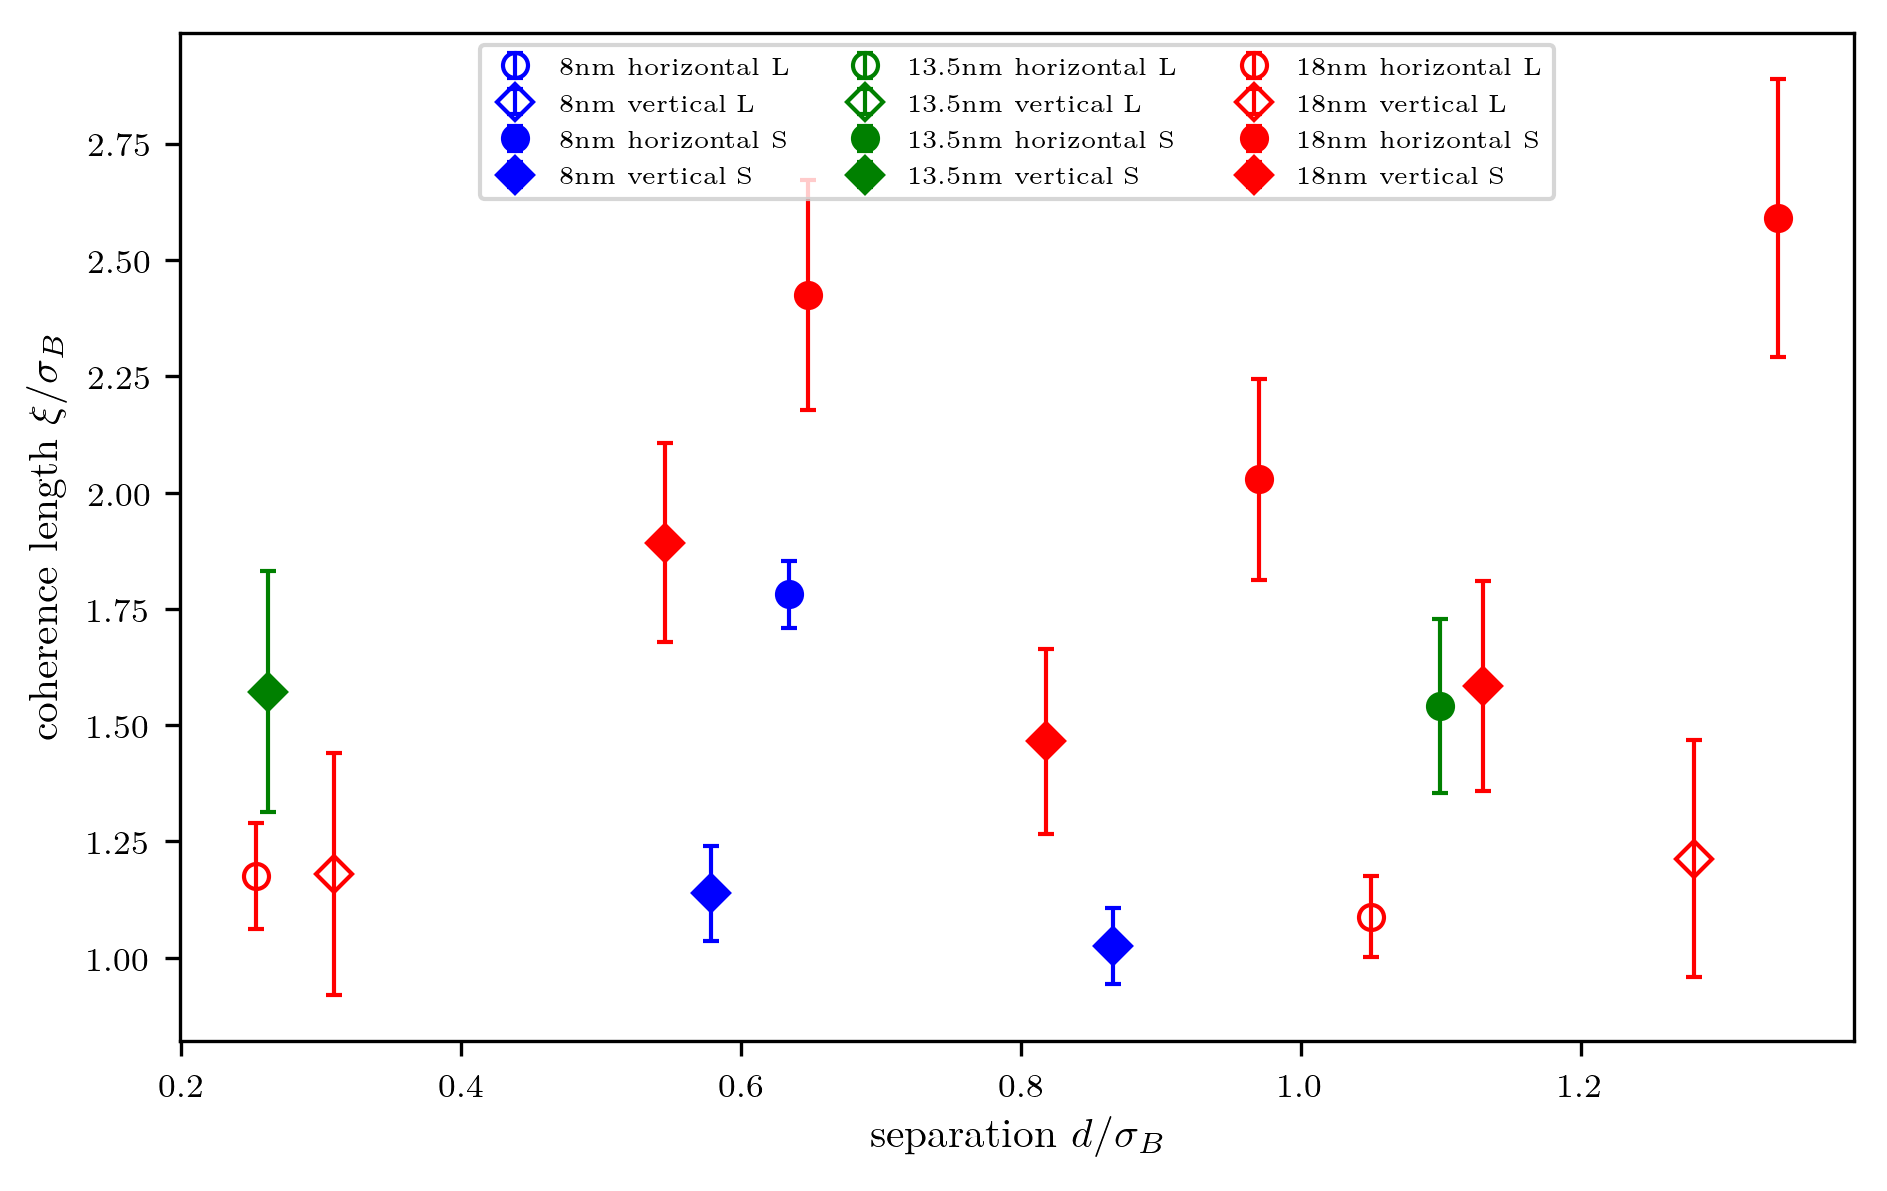

In [110]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True)
ax = axs

x_name = 'd / σ_B'
y_name = 'ξ/σ_B'
yerr_name = 'ξ/σ_err'

label = '8nm horizontal L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
            capsize=2, elinewidth=1, markeredgewidth=1, color='blue', fillstyle='none', label=label)
label = '8nm vertical L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
            capsize=2, elinewidth=1, markeredgewidth=1, color='blue', fillstyle='none', label=label)
label = '8nm horizontal S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='blue', label=label)
label = '8nm vertical S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='blue', label=label)

label = '13.5nm horizontal L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='green', fillstyle='none', label=label)
label = '13.5nm vertical L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='green', fillstyle='none', label=label)
label = '13.5nm horizontal S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='green', label=label)
label = '13.5nm vertical S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='green', label=label)

label = '18nm horizontal L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='red', fillstyle='none', label=label)
label = '18nm vertical L'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='red', fillstyle='none', label=label)
label = '18nm horizontal S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='o',
           capsize=2, elinewidth=1, markeredgewidth=1, color='red', label=label)
label = '18nm vertical S'
x = df[df['label']==label][x_name]
y = df[df['label']==label][y_name]
yerr = df[df['label']==label][yerr_name]
ax.errorbar(x, y, yerr=yerr, fmt='D',
           capsize=2, elinewidth=1, markeredgewidth=1, color='red', label=label)

plt.legend(loc=9, ncol=3, prop={'size': 6})

ax.set_xlabel('separation $ d / \\sigma_B $')
ax.set_ylabel('coherence length $ \\xi / \sigma_B $')
plt.show()

savefigure = True
if savefigure == True:
    fig.savefig('coherencelength_over_sigma_beam_vs_separation.pdf', bbox_inches = 'tight')
    fig.savefig('coherencelength_over_sigma_beam_vs_separation.png', bbox_inches = 'tight')

C:\Users\Thomas\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
